Assignment Day 28 - Exploring Other Machine Learning Models with Python (Unsupervised) Part I <br>
Nama : Chintia Hildayanti <br>
Data Science 26

## Import Package

In [61]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## Load Dataset

In [62]:
boston = pd.read_csv('housing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### About The Dataset

* Criminal rate (crim) <br>
* Residential land zoned proportion (zn)
* Non-retail business acres proportion (indus) <br>
* Is bounds with river (chas) <br>
* Nitrogen oxides concentration (nox) <br>
* Number rooms average (rm) <br>
* Owner age proportion (age) <br>
* Weighted distance to cities (dis) <br>
* Accessibility index (rad) <br>
* Tax rate (tax) <br>
* Pupil-teacher ratio (ptratio) <br>
* Black proportion (black) <br>
* Percent lower status (lstat) <br>


## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dan tidak melakukan reduksi dimensi untuk dibandingkan hasilnya bagus mana menggunakan PCA vs Non-PCA vs FA (optional)

In [64]:
# check missing value
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [65]:
# check data duplikat
boston.duplicated().sum()

0

In [66]:
boston.shape

(506, 14)

<Axes: >

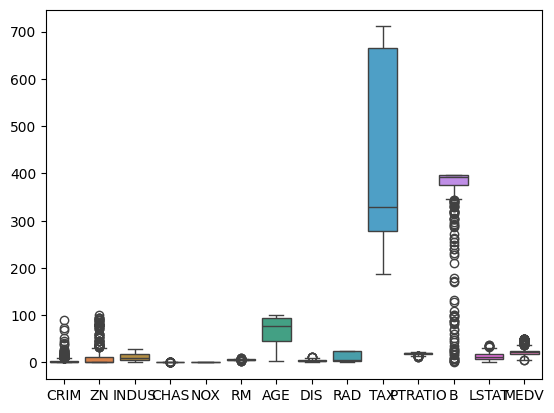

In [67]:
# mengecek distribusi data numerik dan mendeteksi outlier

sns.boxplot(boston)

In [68]:
# menentukan feature dan target

feats = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [69]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [70]:
# feature scalling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
boston_new = pd.DataFrame(data = X_std, columns = feats)
boston_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

A. PCA tanpa Scalling

In [71]:
# PCA tanpa Scalling
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(X)
pcs = pca.transform(X)

X_pca_ori = pd.DataFrame(data = pcs, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
X_pca_ori['MEDV'] = y
X_pca_ori.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-119.818843,-5.560056,-3.172693,5.291593,-1.818728,-6.312070,-1.032609,5.477971,-1.935498,-0.329154,0.378374,-0.071311,0.033545,24.0
1,-168.890155,10.116209,-30.781887,1.296776,0.369680,-3.241821,-0.628651,0.915626,0.467686,1.299810,0.048674,-0.094734,-0.033150,21.6
2,-169.311707,14.080532,-16.753628,-10.278399,-0.093409,-5.910068,1.718753,0.510026,0.414966,0.910646,-0.467469,-0.107257,-0.004509,34.7
3,-190.230642,18.302463,-6.534195,-19.644921,1.513442,-6.959925,-1.971382,0.845947,1.063487,0.964424,-0.276214,-0.052466,0.043716,33.4
4,-190.133451,16.097947,-13.158520,-14.178141,1.761005,-5.760987,-3.059650,1.032843,1.062885,1.123178,-0.538077,-0.055400,0.035538,36.2


In [72]:
# pca explained variance tanpa scalling

print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [3.08899113e+04 6.25033006e+03 8.18363958e+02 2.66684838e+02
 4.98315275e+01 2.78767934e+01 1.60633859e+01 9.52731770e+00
 3.27333185e+00 1.18094181e+00 2.55155742e-01 6.00984544e-02
 3.05445673e-03]
Explained variance ratio: [8.05823175e-01 1.63051968e-01 2.13486092e-02 6.95699061e-03
 1.29995193e-03 7.27220158e-04 4.19044539e-04 2.48538539e-04
 8.53912023e-05 3.08071548e-05 6.65623182e-06 1.56778461e-06
 7.96814208e-08]


In [73]:
# pca explained variance ratio tanpa scalling

cumsum = np.cumsum(pca.explained_variance_ratio_*100)
cumsum

array([ 80.58231752,  96.8875143 ,  99.02237522,  99.71807428,
        99.84806947,  99.92079149,  99.96269594,  99.98754979,
        99.99608891,  99.99916963,  99.99983525,  99.99999203,
       100.        ])

In [74]:
# dari 13 fitur --> pc1 maka hanya mengcover 80% informasi original dan ada loss 20%
# dari 13 fitur --> pc1 + pc2 maka hanya mengcover 96% informasi original dan ada loss 4%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10 + pc11 + pc12 maka hanya mengcover 99% informasi original dan ada loss 1%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10 + pc11 + pc12 + pc13 maka hanya mengcover 100% informasi original dan ada loss 0%

<BarContainer object of 13 artists>

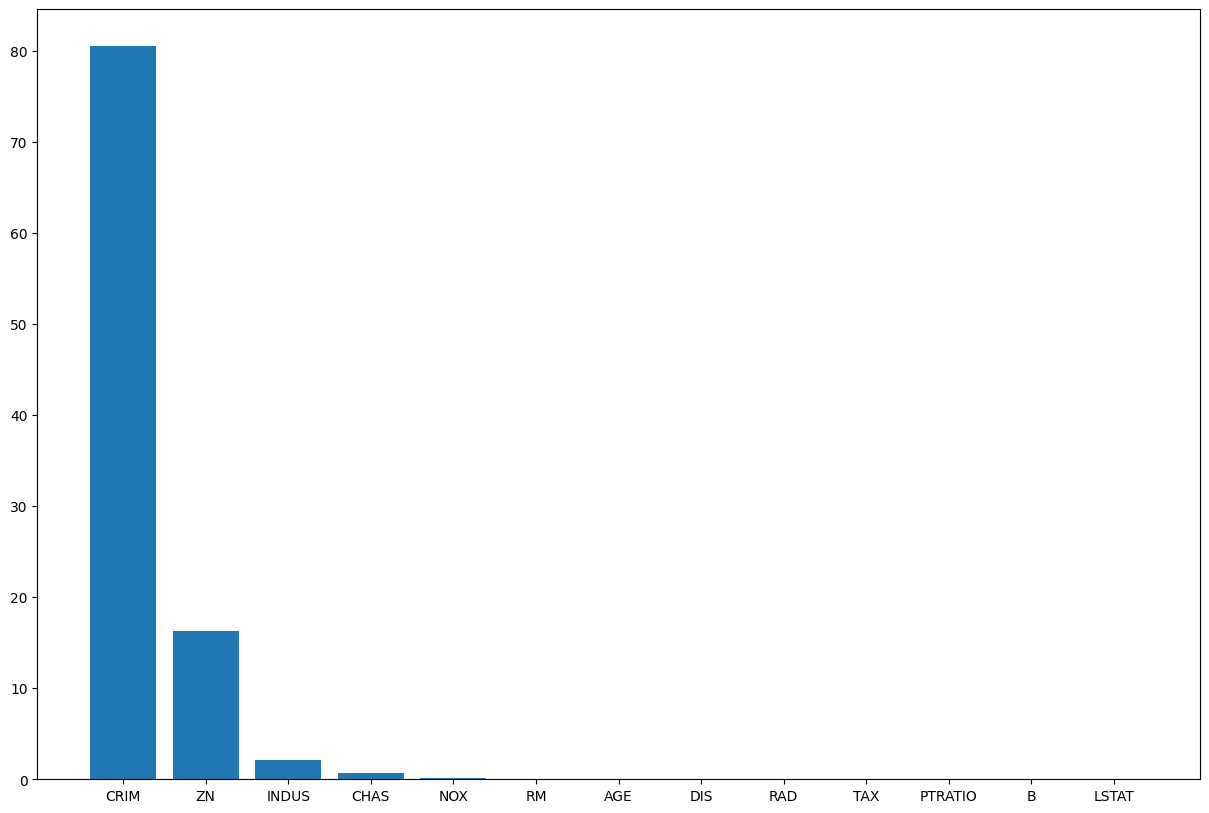

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], pca.explained_variance_ratio_ * 100)

B. Reduksi dimensi tanpa scalling dengan PCA noise 20%

In [76]:
# reduksi dimensi dengan pca tanpa scalling noise 20%

pca_one = PCA(n_components=1)
pca_one.fit(X)
pcs_one = pca_one.transform(X)

X_pca_one = pd.DataFrame(data = pcs_one, columns = ['CRIM'])
X_pca_one['MEDV'] = y
X_pca_one.head()

,CRIM,MEDV
0,-119.818843,24.0
1,-168.890155,21.6
2,-169.311707,34.7
3,-190.230642,33.4
4,-190.133451,36.2


C. Reduksi dimensi tanpa scalling dengan PCA noise 5%

In [77]:
# reduksi dimensi dengan pca tanpa scalling noise 5%

pca_two = PCA(n_components=2)
pca_two.fit(X)
pcs_two = pca_two.transform(X)

X_pca_two = pd.DataFrame(data = pcs_two, columns = ['CRIM', 'ZN'])
X_pca_two['MEDV'] = y
X_pca_two.head()

,CRIM,ZN,MEDV
0,-119.818843,-5.560056,24.0
1,-168.890155,10.116209,21.6
2,-169.311707,14.080532,34.7
3,-190.230642,18.302463,33.4
4,-190.133451,16.097947,36.2


D. PCA dengan scalling

In [78]:
# PCA dengan Scalling
from sklearn.decomposition import PCA

pca_sca = PCA(n_components=13)
pca_sca.fit(X_std)
pcs_sca = pca_sca.transform(X_std)

X_pca_sca = pd.DataFrame(data = pcs_sca, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
X_pca_sca['MEDV'] = y
X_pca_sca.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,0.007847,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,0.014274,36.2


In [79]:
# pca explained variance dengan scalling

print('Explained variance:', pca_sca.explained_variance_)
print('Explained variance ratio:', pca_sca.explained_variance_ratio_)

Explained variance: [6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]
Explained variance ratio: [0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


In [80]:
# pca explained variance ratio dengan scalling

cumsum_sca = np.cumsum(pca_sca.explained_variance_ratio_*100)
cumsum_sca

array([ 47.12960636,  58.1547996 ,  67.7133894 ,  74.310121  ,
        80.73178205,  85.78876032,  89.90688406,  92.95378648,
        95.08411979,  96.7782569 ,  98.20913665,  99.51146723,
       100.        ])

In [81]:
# dari 13 fitur --> pc1 maka hanya mengcover 47% informasi original dan ada loss 53%
# dari 13 fitur --> pc1 + pc2 maka hanya mengcover 58% informasi original dan ada loss 42%
# dari 13 fitur --> pc1 + pc2 + pc3 maka hanya mengcover 67% informasi original dan ada loss 33%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 maka hanya mengcover 74% informasi original dan ada loss 26%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 maka hanya mengcover 80% informasi original dan ada loss 20%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 maka hanya mengcover 85% informasi original dan ada loss 15%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 maka hanya mengcover 89% informasi original dan ada loss 11%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 maka hanya mengcover 92% informasi original dan ada loss 8%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 maka hanya mengcover 95% informasi original dan ada loss 5%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10 maka hanya mengcover 96% informasi original dan ada loss 4%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10 + pc11 maka hanya mengcover 98% informasi original dan ada loss 2%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10 + pc11 + pc12 maka hanya mengcover 99% informasi original dan ada loss 1%
# dari 13 fitur --> pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10 + pc11 + pc12 + pc13 maka hanya mengcover 100% informasi original dan ada loss 0%

<BarContainer object of 13 artists>

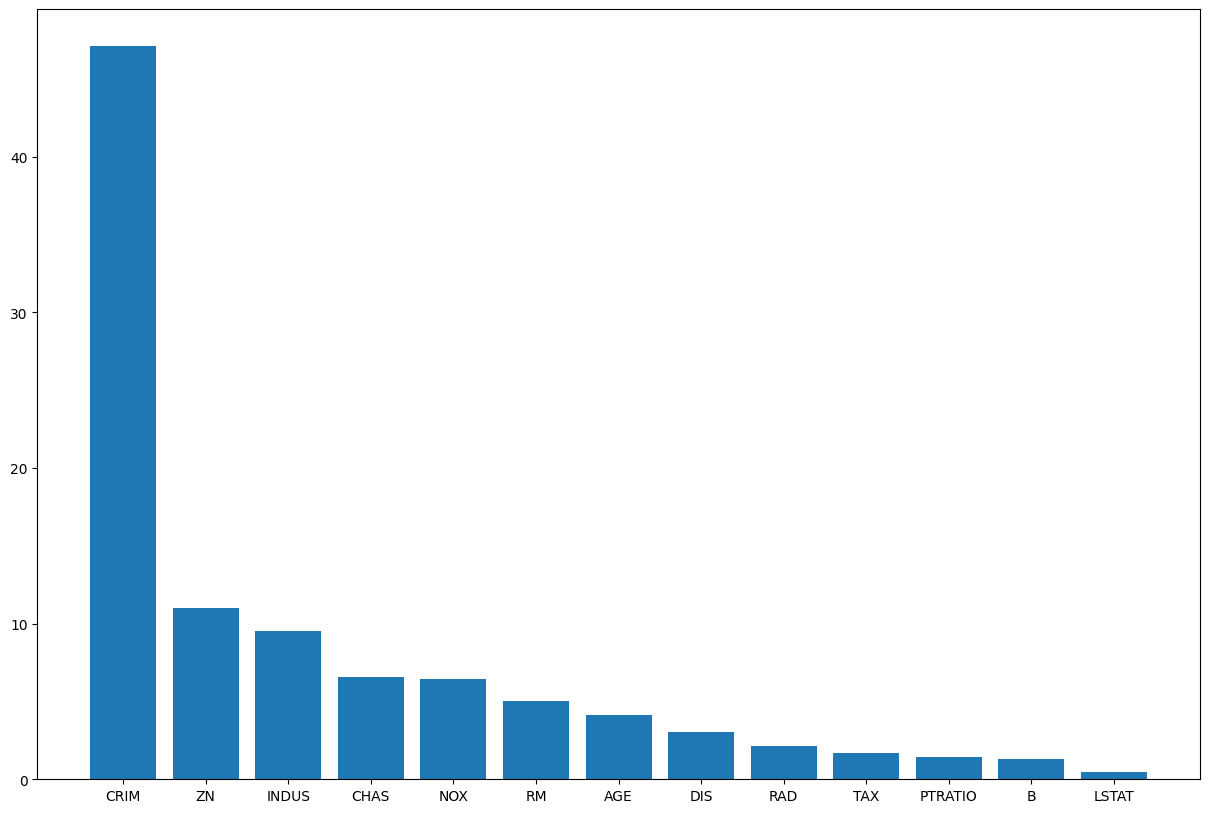

In [82]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], pca_sca.explained_variance_ratio_ * 100)

E. Reduksi dimensi dengan scalling dengan PCA noise 20%

In [83]:
# reduksi dimensi dengan pca dengan scalling noise 20%

pca_sca_one = PCA(n_components=5)
pca_sca_one.fit(X_std)
pcs_sca_one = pca_sca_one.transform(X_std)

X_pca_sca_one = pd.DataFrame(data = pcs_sca_one, columns = ['CRIM','ZN','INDUS','CHAS','NOX'])
X_pca_sca_one['MEDV'] = y
X_pca_sca_one.head()

,CRIM,ZN,INDUS,CHAS,NOX,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,36.2


F. Reduksi dimensi dengan scalling dengan PCA noise 5%

In [84]:
# reduksi dimensi dengan pca dengan scalling noise 5%

pca_sca_two = PCA(n_components=9)
pca_sca_two.fit(X_std)
pcs_sca_two = pca_sca_two.transform(X_std)

X_pca_sca_two = pd.DataFrame(data = pcs_sca_two, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD'])
X_pca_sca_two['MEDV'] = y
X_pca_sca_two.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,36.2


dilihat dari hasil keduanya <br>
data tanpa proses scalling PCA explained variance ratio terlihat lebih baik dibandingkan data yang sudah melalui proses scalling <br>
pada data pca tanpa scalling pc1 mampu mengcover 80% informasi original dan ada loss 20% <br>
sedangkan pada data yang telah discalling pc1 hanya mampu mengcover 47% informasi dan ada loss 53% <br>
butuh 5 fitur (pc1, pc2, pc3, pc4, pc5) untuk mengcover 80% informasi original dengan loss 20%

## Regression Model (20 point)

A. Data Original (tanpa scalling & reduksi dimensi PCA)

In [85]:
# split train test data original

from sklearn.model_selection import train_test_split

X_ori = boston.drop('MEDV', axis=1)
y_ori = boston['MEDV']

X_train_ori, X_test_ori,Y_train_ori,Y_test_ori = train_test_split(X_ori,y_ori,
                                                test_size = 0.20,
                                                random_state = 42)

In [86]:
# Multiple Regression
from sklearn.linear_model import LinearRegression

# define the model
multi_reg_ori = LinearRegression()

# train the model
ftr_ori_train = X_train_ori.to_numpy()
tgt_ori_train = Y_train_ori.to_numpy()
tgt_ori_train = tgt_ori_train.reshape(len(tgt_ori_train,))


multi_reg_ori.fit(ftr_ori_train, tgt_ori_train)

LinearRegression()

In [87]:
# retrieve the coefficients
# show as a nice dataframe

data = X_train_ori
model = multi_reg_ori

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,30.246751
1,CRIM,-0.113056
2,ZN,0.030110
3,INDUS,0.040381
4,CHAS,2.784438
5,NOX,-17.202633
6,RM,4.438835
7,AGE,-0.006296
8,DIS,-1.447865
9,RAD,0.262430


B. Model Multiple Regression tanpa scalling, reduksi dimensi PCA dengan noise 20%

In [88]:
# split train test data tanpa scalling, pca 20%

X_pca_n20 = X_pca_one.drop('MEDV', axis=1)
y_pca_n20 = X_pca_one['MEDV']

X_train_pca_n20, X_test_pca_n20,Y_train_pca_n20,Y_test_pca_n20 = train_test_split(X_pca_n20,y_pca_n20,
                                                test_size = 0.20,
                                                random_state = 42)

In [89]:
# define the model
multi_reg_pca20 = LinearRegression()

# train the model data tanpa scalling, pca 20%

ftr_pca_n20_train = X_train_pca_n20.to_numpy()
tgt_pca_n20_train = Y_train_pca_n20.to_numpy()
tgt_pca_n20_train = tgt_pca_n20_train.reshape(len(tgt_pca_n20_train,))

multi_reg_pca20.fit(ftr_pca_n20_train, tgt_pca_n20_train)

LinearRegression()

In [90]:
# retrieve the coefficients
# show as a nice dataframe

data = X_train_pca_n20
model = multi_reg_pca20

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.695703
1,CRIM,-0.025805


C. Model Multiple Regression tanpa scalling, reduksi dimensi PCA dengan noise 5%

In [91]:
# split train test data tanpa scalling, pca 5%

X_pca_n5 = X_pca_two.drop('MEDV', axis=1)
y_pca_n5 = X_pca_two['MEDV']

X_train_pca_n5, X_test_pca_n5,Y_train_pca_n5,Y_test_pca_n5 = train_test_split(X_pca_n5,y_pca_n5,
                                                test_size = 0.20,
                                                random_state = 42)

In [92]:
# define the model
multi_reg_pca5 = LinearRegression()

# train the model data tanpa scalling, pca 5%

ftr_pca_n5_train = X_train_pca_n5.to_numpy()
tgt_pca_n5_train = Y_train_pca_n5.to_numpy()
tgt_pca_n5_train = tgt_pca_n5_train.reshape(len(tgt_pca_n5_train,))

multi_reg_pca5.fit(ftr_pca_n5_train, tgt_pca_n5_train)

LinearRegression()

In [93]:
# retrieve the coefficients
# show as a nice dataframe

data = X_train_pca_n5
model = multi_reg_pca5

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.712395
1,CRIM,-0.025744
2,ZN,-0.010220


D. Model Multiple Regression dengan scalling, tanpa pca

In [94]:
# split train test data dengan scalling, tanpa pca

X_sca = boston_new
y_sca= boston['MEDV']

X_train_sca, X_test_sca,Y_train_sca,Y_test_sca = train_test_split(X_sca,y_sca,
                                                test_size = 0.20,
                                                random_state = 42)

In [95]:
# define the model
multi_reg_sca = LinearRegression()

# train the model data dengan scalling, tanpa pca

ftr_sca_train = X_train_sca.to_numpy()
tgt_sca_train = Y_train_sca.to_numpy()
tgt_sca_train = tgt_sca_train.reshape(len(tgt_sca_train,))

multi_reg_sca.fit(ftr_sca_train, tgt_sca_train)

LinearRegression()

In [96]:
# retrieve the coefficients
# show as a nice dataframe

data = X_train_sca
model = multi_reg_sca

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.485268
1,CRIM,-0.971494
2,ZN,0.701556
3,INDUS,0.276752
4,CHAS,0.706532
5,NOX,-1.991430
6,RM,3.115718
7,AGE,-0.177060
8,DIS,-3.045771
9,RAD,2.282785


E. Model Multiple Regression dengan scalling, reduksi dimensi PCA dengan noise 20%

In [97]:
# split train test data dengan scalling, pca 20%

X_sca_n20 = X_pca_sca_one.drop('MEDV', axis=1)
y_sca_n20 = X_pca_sca_one['MEDV']

X_train_sca_n20, X_test_sca_n20,Y_train_sca_n20,Y_test_sca_n20 = train_test_split(X_sca_n20,y_sca_n20,
                                                test_size = 0.20,
                                                random_state = 42)

In [98]:
# define the model
multi_reg_sca20 = LinearRegression()

# train the model data dengan scalling, pca 20%

ftr_sca_n20_train = X_train_sca_n20.to_numpy()
tgt_sca_n20_train = Y_train_sca_n20.to_numpy()
tgt_sca_n20_train = tgt_sca_n20_train.reshape(len(tgt_sca_n20_train,))

multi_reg_sca20.fit(ftr_sca_n20_train, tgt_sca_n20_train)

LinearRegression()

In [99]:
# retrieve the coefficients
# show as a nice dataframe

data = X_train_sca_n20
model = multi_reg_sca20

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.432952
1,CRIM,-2.301870
2,ZN,2.414202
3,INDUS,3.414079
4,CHAS,-1.133952
5,NOX,-2.539600


F. Model Multiple Regression dengan scalling, reduksi dimensi PCA dengan noise 5%

In [100]:
# split train test data dengan scalling, pca 5%

X_sca_n5 = X_pca_sca_two.drop('MEDV', axis=1)
y_sca_n5 = X_pca_sca_two['MEDV']

X_train_sca_n5, X_test_sca_n5,Y_train_sca_n5,Y_test_sca_n5 = train_test_split(X_sca_n5,y_sca_n5,
                                                test_size = 0.20,
                                                random_state = 42)

In [101]:
# define the model
multi_reg_sca5 = LinearRegression()

# train the model data dengan scalling, pca 5%

ftr_sca_n5_train = X_train_sca_n5.to_numpy()
tgt_sca_n5_train = Y_train_sca_n5.to_numpy()
tgt_sca_n5_train = tgt_sca_n5_train.reshape(len(tgt_sca_n5_train,))


multi_reg_sca5.fit(ftr_sca_n5_train, tgt_sca_n5_train)

LinearRegression()

In [102]:
# retrieve the coefficients
# show as a nice dataframe

data = X_train_sca_n5
model = multi_reg_sca5

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.427134
1,CRIM,-2.307454
2,ZN,2.411787
3,INDUS,3.408901
4,CHAS,-1.163306
5,NOX,-2.601111
6,RM,-0.676686
7,AGE,-0.107418
8,DIS,1.062573
9,RAD,0.224089


## Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

A. evaluasi model multiple regression dengan data original tanpa scalling & tanpa pca

In [105]:
# training error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

boston_predict_train = multi_reg_ori.predict(ftr_ori_train)

print('RMSE for training data_original is {}'.format(np.sqrt(mean_squared_error(Y_train_ori, boston_predict_train))))
print('MAE for training data_original is {}'.format(mean_absolute_error(Y_train_ori, boston_predict_train)))
print('MAPE for training data_original is {}'.format(mean_absolute_percentage_error(Y_train_ori, boston_predict_train)))

RMSE for training data_original is 4.6520331848801675
MAE for training data_original is 3.314771626783228
MAPE for training data_original is 0.1657491434953396


In [106]:
# Testing error

feature_boston_ori_test = X_test_ori.to_numpy()
target_boston_ori_test = Y_test_ori.to_numpy()
target_boston_ori_test = target_boston_ori_test.reshape(len(target_boston_ori_test))
target_boston_predict_test = multi_reg_ori.predict(feature_boston_ori_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_boston_ori_test, target_boston_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_boston_ori_test, target_boston_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_boston_ori_test, target_boston_predict_test)))

RMSE for testing data is 4.928602182665332
MAE for testing data is 3.189091965887837
MAPE for testing data is 0.16866394539378646


B. evaluasi model multiple regression tanpa scalling & reduksi dimensi PCA dengan noise 20%

In [107]:
# training error

boston_pca20_predict_train = multi_reg_pca20.predict(ftr_pca_n20_train)

print('RMSE for training data_original is {}'.format(np.sqrt(mean_squared_error(Y_train_pca_n20, boston_pca20_predict_train))))
print('MAE for training data_original is {}'.format(mean_absolute_error(Y_train_pca_n20, boston_pca20_predict_train)))
print('MAPE for training data_original is {}'.format(mean_absolute_percentage_error(Y_train_pca_n20, boston_pca20_predict_train)))

RMSE for training data_original is 8.178308078875485
MAE for training data_original is 5.970399692490932
MAPE for training data_original is 0.28626918480848734


In [108]:
# Testing error

feature_boston_pca20_test = X_test_pca_n20.to_numpy()
target_boston_pca20_test = Y_test_pca_n20.to_numpy()
target_boston_pca20_test = target_boston_pca20_test.reshape(len(target_boston_pca20_test))
target_boston_pca20_predict_test = multi_reg_pca20.predict(feature_boston_pca20_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_boston_pca20_test, target_boston_pca20_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_boston_pca20_test, target_boston_pca20_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_boston_pca20_test, target_boston_pca20_predict_test)))

RMSE for testing data is 7.3962397641195174
MAE for testing data is 5.330118497281184
MAPE for testing data is 0.27979081921426613


C. evaluasi model multiple regression tanpa scalling & reduksi dimensi PCA dengan noise 5%

In [109]:
# training error

boston_pca5_predict_train = multi_reg_pca5.predict(ftr_pca_n5_train)

print('RMSE for training data_original is {}'.format(np.sqrt(mean_squared_error(Y_train_pca_n5, boston_pca5_predict_train))))
print('MAE for training data_original is {}'.format(mean_absolute_error(Y_train_pca_n5, boston_pca5_predict_train)))
print('MAPE for training data_original is {}'.format(mean_absolute_percentage_error(Y_train_pca_n5, boston_pca5_predict_train)))

RMSE for training data_original is 8.13829556188147
MAE for training data_original is 5.9517040316586005
MAPE for training data_original is 0.2858422657201555


In [110]:
# Testing error

feature_boston_pca5_test = X_test_pca_n5.to_numpy()
target_boston_pca5_test = Y_test_pca_n5.to_numpy()
target_boston_pca5_test = target_boston_pca5_test.reshape(len(target_boston_pca5_test))
target_boston_pca5_predict_test = multi_reg_pca5.predict(feature_boston_pca5_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_boston_pca5_test, target_boston_pca5_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_boston_pca5_test, target_boston_pca5_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_boston_pca5_test, target_boston_pca5_predict_test)))

RMSE for testing data is 7.416511174575679
MAE for testing data is 5.405685672090238
MAPE for testing data is 0.28674993403792925


D. evaluasi model multiple regression dengan scalling & tanpa reduksi dimensi PCA

In [111]:
# training error

boston_sca_predict_train = multi_reg_sca.predict(ftr_sca_train)

print('RMSE for training data_original is {}'.format(np.sqrt(mean_squared_error(Y_train_sca, boston_sca_predict_train))))
print('MAE for training data_original is {}'.format(mean_absolute_error(Y_train_sca, boston_sca_predict_train)))
print('MAPE for training data_original is {}'.format(mean_absolute_percentage_error(Y_train_sca, boston_sca_predict_train)))

RMSE for training data_original is 4.6520331848801675
MAE for training data_original is 3.314771626783231
MAPE for training data_original is 0.16574914349533976


In [112]:
# Testing error

feature_boston_sca_test = X_test_sca.to_numpy()
target_boston_sca_test = Y_test_sca.to_numpy()
target_boston_sca_test = target_boston_sca_test.reshape(len(target_boston_sca_test))
target_boston_sca_predict_test = multi_reg_sca.predict(feature_boston_sca_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_boston_sca_test, target_boston_sca_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_boston_sca_test, target_boston_sca_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_boston_sca_test, target_boston_sca_predict_test)))

RMSE for testing data is 4.928602182665337
MAE for testing data is 3.1890919658878496
MAPE for testing data is 0.16866394539378723


E. evaluasi model multiple regression dengan scalling & dengan reduksi dimensi PCA 20%

In [113]:
# training error

boston_sca20_predict_train = multi_reg_sca20.predict(ftr_sca_n20_train)

print('RMSE for training data_original is {}'.format(np.sqrt(mean_squared_error(Y_train_sca_n20, boston_sca20_predict_train))))
print('MAE for training data_original is {}'.format(mean_absolute_error(Y_train_sca_n20, boston_sca20_predict_train)))
print('MAPE for training data_original is {}'.format(mean_absolute_percentage_error(Y_train_sca_n20, boston_sca20_predict_train)))

RMSE for training data_original is 4.973154044133186
MAE for training data_original is 3.4208844296326877
MAPE for training data_original is 0.17395742134565065


In [114]:
# Testing error

feature_boston_sca20_test = X_test_sca_n20.to_numpy()
target_boston_sca20_test = Y_test_sca_n20.to_numpy()
target_boston_sca20_test = target_boston_sca20_test.reshape(len(target_boston_sca20_test))
target_boston_sca20_predict_test = multi_reg_sca20.predict(feature_boston_sca20_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_boston_sca20_test, target_boston_sca20_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_boston_sca20_test, target_boston_sca20_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_boston_sca20_test, target_boston_sca20_predict_test)))

RMSE for testing data is 5.460746817883854
MAE for testing data is 3.322436041022961
MAPE for testing data is 0.17752209954186882


F. evaluasi model multiple regression dengan scalling & dengan reduksi dimensi PCA 5%

In [115]:
# training error

boston_sca5_predict_train = multi_reg_sca5.predict(ftr_sca_n5_train)

print('RMSE for training data_original is {}'.format(np.sqrt(mean_squared_error(Y_train_sca_n5, boston_sca5_predict_train))))
print('MAE for training data_original is {}'.format(mean_absolute_error(Y_train_sca_n5, boston_sca5_predict_train)))
print('MAPE for training data_original is {}'.format(mean_absolute_percentage_error(Y_train_sca_n5, boston_sca5_predict_train)))

RMSE for training data_original is 4.893431849894649
MAE for training data_original is 3.3505192176300826
MAPE for training data_original is 0.16888798591470988


In [117]:
# Testing error

feature_boston_sca5_test = X_test_sca_n5.to_numpy()
target_boston_sca5_test = Y_test_sca_n5.to_numpy()
target_boston_sca5_test = target_boston_sca5_test.reshape(len(target_boston_sca5_test))
target_boston_sca5_predict_test = multi_reg_sca5.predict(feature_boston_sca5_test)

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(target_boston_sca5_test, target_boston_sca5_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(target_boston_sca5_test, target_boston_sca5_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(target_boston_sca5_test, target_boston_sca5_predict_test)))

RMSE for testing data is 5.432338568801017
MAE for testing data is 3.3409755403020367
MAPE for testing data is 0.17985001413457363


Iterpretasi hasil <br>

saya memilih model multiple regression dengan data original tanpa scalling dan data original dengan scalling sebagai yang terbaik, karena <br>
model multiple regression dengan data original tanpa scalling dan data original dengan scalling memiliki nilai RMSE, MAE, MAPE yang sama dan paling kecil diantara semua model<br>

Nilai MAPE training data adalah 0.1657 (16.57%) artinya model multiple regression (tanpa PCA) dapat memprediksi dengan baik 83.43% data training, dan nilai MAPE testing adalah 16,86% yang artinya model multiple regression (tanpa PCA) dapat memprediksi dengan baik 83.14% data testing <br>

tidak ada perbedaan signifikan antara nilai training dan test yang artinya model terbaik ini juga tidak overfitting <br>

karena performa model dengan data original tanpa PCA memiliki hasil yang lebih baik dibandingkan data dengan proses PCA, kemungkinan data ini tidak memiliki banyak noise